In [ ]:
## Sales Data Analysis: Uncovering Trends and Insights from a Sales Dataset

In [2]:
#### Importing necessary module 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
### Reading the csv data 

df = pd.read_csv('Dataset.csv')

In [ ]:
### Showing the first 5 row of the data

df.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
190,191,2024-11-10,C020,Laptop,1,1000,1082.12
191,192,2024-06-08,C016,Laptop,1,1000,1024.95
192,193,2024-04-05,C013,Monitor,1,200,193.43
193,194,2024-08-20,C018,Phone,1,600,639.01
194,195,2024-06-28,C010,Phone,1,600,583.57
195,196,2024-04-22,C019,Monitor,1,200,181.37
196,197,2024-11-13,C017,Laptop,1,1000,1066.13
197,198,2024-02-21,C019,Tablet,1,400,387.62
198,199,2024-09-24,C005,Phone,2,600,1265.72
199,200,2024-10-21,C009,Laptop,1,1000,972.55


In [ ]:
### Showing information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [9]:
### Changing the data type of the date column to DATE

df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     200 non-null    int64         
 1   Date        200 non-null    datetime64[ns]
 2   CustomerID  200 non-null    object        
 3   Product     190 non-null    object        
 4   Quantity    200 non-null    int64         
 5   Price       200 non-null    int64         
 6   Total       194 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 11.1+ KB


In [15]:
### checking for missing values

df.isnull().sum()

OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64

In [ ]:
### checking for missing values


check_missing_values= df[df.isnull().any(axis=1)]

check_missing_values



,OrderID,Date,CustomerID,Product,Quantity,Price,Total
6,7,2024-01-21,C017,NaN,1,1000,975.85
22,23,2024-10-03,C002,Laptop,1,1000,NaN
26,27,2024-09-09,C016,NaN,1,1000,1007.96
28,29,2024-12-10,C009,NaN,2,600,1218.60
35,36,2024-06-23,C003,NaN,1,600,591.78
57,58,2024-09-20,C001,NaN,1,600,612.47
62,63,2024-12-25,C009,NaN,2,1000,2108.75
70,71,2024-02-13,C001,NaN,1,100,96.85
108,109,2024-02-10,C019,Headphones,1,100,NaN
139,140,2024-12-17,C018,Phone,1,600,NaN


In [ ]:
### checking for duplicate rows


duplicate_check = df.duplicated()

print(duplicate_check)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


In [ ]:
### Still checking for duplicate rows

duplicate_check = df[df.duplicated()]

duplicate_check

,OrderID,Date,CustomerID,Product,Quantity,Price,Total


In [ ]:
### Filling missing values with "Unknown_Products and Unknown_Totals"

df.fillna({"Product": "Unknown_Product", "Total": "Unknown_Total"}, inplace=True)

df.isnull().sum()

OrderID       0
Date          0
CustomerID    0
Product       0
Quantity      0
Price         0
Total         0
dtype: int64

In [ ]:
### Viewing Data where Total is Unknown

df_Unkown_Total = df[df['Total'] == 'Unknown_Total']

df_Unkown_Total 

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
22,23,2024-10-03,C002,Laptop,1,1000,Unknown_Total
108,109,2024-02-10,C019,Headphones,1,100,Unknown_Total
139,140,2024-12-17,C018,Phone,1,600,Unknown_Total
151,152,2024-01-13,C010,Laptop,1,1000,Unknown_Total
173,174,2024-07-08,C006,Laptop,1,1000,Unknown_Total
189,190,2024-05-31,C008,Unknown_Product,1,1000,Unknown_Total


In [ ]:
### Renaming colums

df.rename(columns={'OrderID' : "order_id", 'Date' : 'date', "CustomerID": 'customer_id', "Product":"product", 'Quantity': "quantity", "Price" : 'price', "Total":"total"}, inplace=True)

df


,order_id,date,customer_id,product,quantity,price,total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
...,...,...,...,...,...,...,...
195,196,2024-04-22,C019,Monitor,1,200,181.37
196,197,2024-11-13,C017,Laptop,1,1000,1066.13
197,198,2024-02-21,C019,Tablet,1,400,387.62
198,199,2024-09-24,C005,Phone,2,600,1265.72


In [ ]:
### Grouping data by product

df_group = df.groupby('product')

df_group.groups

{'Headphones': [21, 92, 95, 108, 109, 114, 155, 167, 172], 'Laptop': [1, 4, 5, 13, 15, 16, 17, 18, 19, 20, 22, 23, 29, 32, 33, 46, 52, 53, 54, 55, 56, 58, 60, 63, 66, 68, 76, 77, 81, 84, 85, 88, 89, 90, 91, 94, 99, 100, 103, 106, 110, 120, 121, 123, 125, 129, 132, 135, 137, 138, 140, 148, 151, 157, 158, 161, 164, 165, 166, 169, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 185, 186, 190, 191, 196, 199], 'Monitor': [2, 7, 30, 34, 39, 40, 67, 104, 107, 130, 159, 160, 171, 192, 195], 'Phone': [0, 3, 8, 9, 10, 11, 14, 27, 36, 37, 38, 42, 44, 45, 49, 51, 59, 61, 64, 65, 69, 71, 72, 73, 74, 78, 80, 82, 86, 87, 96, 97, 98, 101, 102, 112, 115, 119, 124, 126, 131, 134, 139, 141, 142, 147, 149, 150, 152, 153, 156, 162, 168, 178, 184, 187, 193, 194, 198], 'Tablet': [12, 24, 25, 31, 41, 43, 47, 48, 50, 75, 79, 83, 93, 105, 111, 113, 116, 117, 118, 122, 127, 128, 133, 136, 143, 144, 145, 146, 154, 170, 197], 'Unknown_Product': [6, 26, 28, 35, 57, 62, 70, 163, 188, 189]}

<Axes: xlabel='customer_id', ylabel='quantity'>

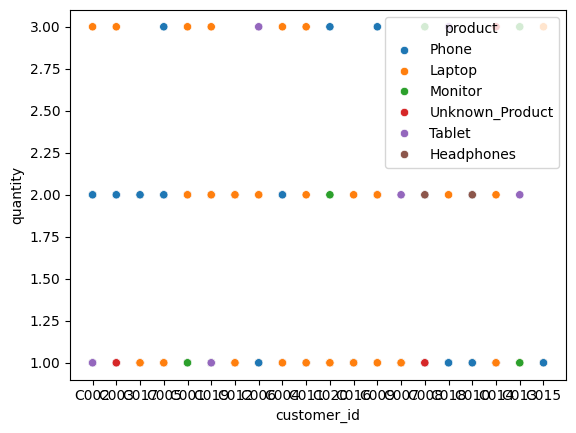

In [ ]:
### Count plot of customer_id aganist quantity

sns.countplot(data=df, x="customer_id", hue="product")

In [ ]:
### Grouping data by sum of quantity

plot1 = df_group['quantity'].sum()
plot1

product
Headphones          12
Laptop             107
Monitor             22
Phone               76
Tablet              42
Unknown_Product     14
Name: quantity, dtype: int64

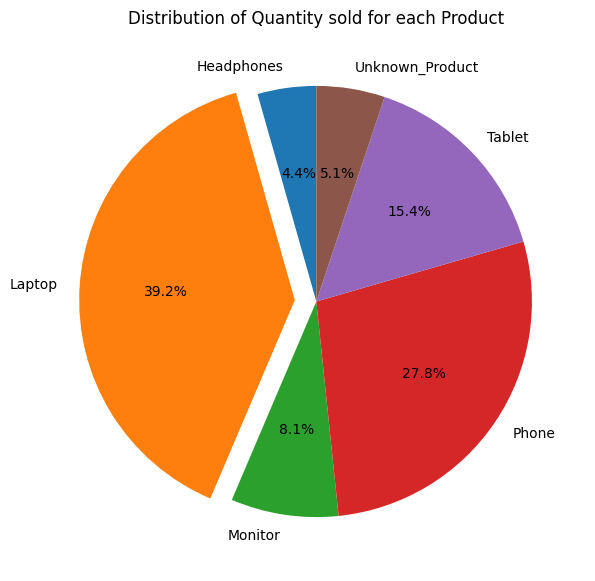

In [ ]:
### Pie chart of percentage of quantity sold for each product

#### **Interpretation:** From the chart it is oberved that laptop is the product with the highest sell.

# explode = [0, 0.1, 0, 0, 0, 0]
explode = [0.1 if label == 'Laptop' else 0 for label in plot1.index]

plt.figure(figsize=(7,7))
plt.pie(plot1, labels=plot1.index, autopct='%1.1f%%',  startangle=90, explode=explode)
plt.title("Distribution of Quantity sold for each Product")

plt.show()



In [ ]:
### Aggregate of quantity of product

#### **Interpretation:** From the table, it shows that laptop have the highest sum ans mean values which is laptop have the highest sell.

aggregate_show = df_group['quantity'].agg(['min', 'max', 'sum', 'mean' ])

aggregate_show

,min,max,sum,mean
product,,,,
Headphones,1,2,12,1.333333
Laptop,1,3,107,1.407895
Monitor,1,3,22,1.466667
Phone,1,3,76,1.288136
Tablet,1,3,42,1.354839
Unknown_Product,1,3,14,1.400000


In [ ]:
### Showing information about the data

df.head()

,order_id,date,customer_id,product,quantity,price,total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


In [ ]:
#### Mapping the month
mapping = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

### Showing monthly sales of product in ascending order

#### **Interpretation:** From the chart it is observed that August have the highest sales of products.



date_show = df.groupby(df['date'].dt.month.map(mapping))['product'].count()

print(date_show.sort_values(ascending=True))

date
March        12
January      13
April        14
October      14
June         16
November     16
May          16
July         16
September    18
December     19
February     21
August       25
Name: product, dtype: int64


<Axes: title={'center': 'Scatter plot of Quantity of Product against Price'}, xlabel='quantity', ylabel='price'>

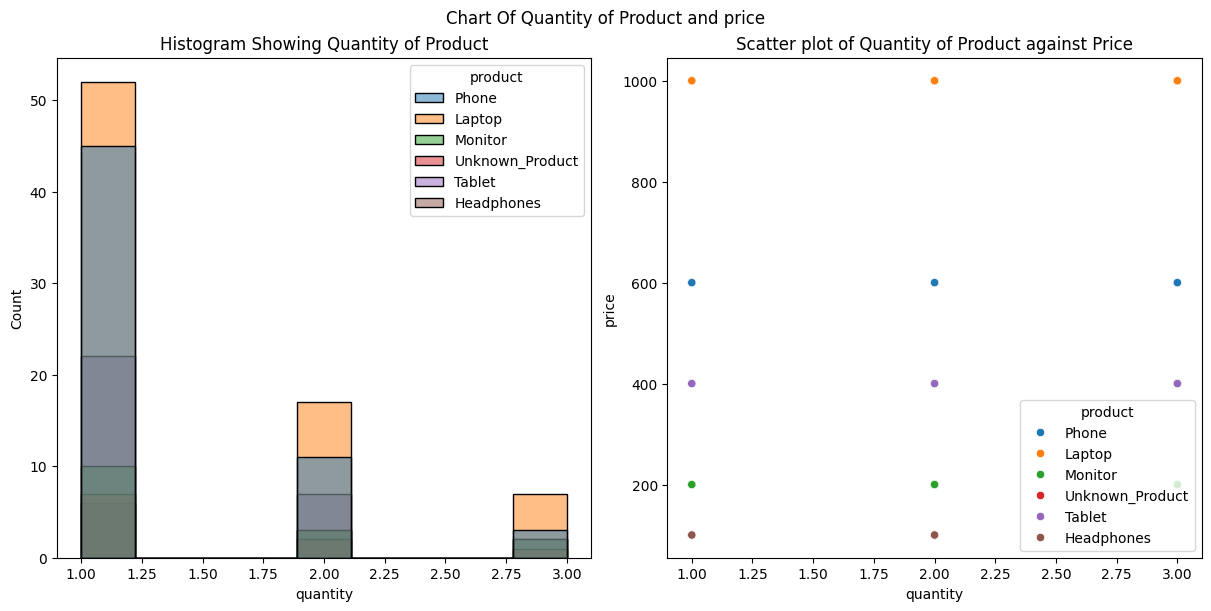

In [ ]:

### Showing histogram and scatter plot of sales and quantity of product.

#### **Interpretation:** From the histogram chart it is observed that laptop have the highest sales followed by Phone. Also from the scatter plot is shows that laptop have the highest sales in different quantity followed by phone.

fig, axs = plt.subplots(1, 2, figsize=(12, 6), layout="constrained")
plt.suptitle("Chart Of Quantity of Product and price")

axs[0].set_title("Histogram Showing Quantity of Product")
sns.histplot(data=df, x='quantity', hue='product', ax=axs[0])

axs[1].set_title("Scatter plot of Quantity of Product against Price")
sns.scatterplot(data=df, x="quantity", y="price", hue="product", ax=axs[1])

